In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize']=(12,5)

In [2]:
df = pd.read_csv('data.csv', sep = ';')

df.head(3)

,City,Общ транспорт,Электроник,Эффективность ЧТ,Shared T,Внешнее подкл,Билетная сист,Устойчивость,Дороги,Безопасность,Доступность ЧТ,Комфорт,Эффективность ОТ,Наличие ОТ,Интермодальность
0,London,4,3,2,3,2,1,8,3,3,3,3,1,1,2
1,Shanghai,3,4,6,8,4,3,6,1,1,5,2,5,9,1
2,Singapore,5,1,1,7,6,5,1,2,2,23,1,8,5,5


In [3]:
X = df.iloc[:,1:]. values
X = (X - X.mean(axis=0))/X.std(axis=0)

In [4]:
X.mean(axis=0)

array([ 1.85037171e-17,  0.00000000e+00,  0.00000000e+00, -9.25185854e-18,
        4.62592927e-18,  3.70074342e-17,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -9.25185854e-17, -3.70074342e-17,  0.00000000e+00,
       -2.77555756e-17, -3.70074342e-17])

In [5]:
X.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [6]:
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

Z = linkage(X, method='average', metric='euclidean')

Z

array([[22.        , 23.        ,  1.40810357,  2.        ],
       [19.        , 21.        ,  1.52962176,  2.        ],
       [24.        , 25.        ,  1.70716367,  4.        ],
       [ 0.        ,  1.        ,  1.76356261,  2.        ],
       [20.        , 26.        ,  1.91611263,  5.        ],
       [ 6.        ,  7.        ,  2.06853782,  2.        ],
       [ 8.        , 10.        ,  2.41842282,  2.        ],
       [16.        , 18.        ,  2.48363157,  2.        ],
       [11.        , 12.        ,  2.60936179,  2.        ],
       [13.        , 15.        ,  2.7602018 ,  2.        ],
       [ 4.        ,  9.        ,  2.91465876,  2.        ],
       [30.        , 32.        ,  2.98823371,  4.        ],
       [ 3.        , 27.        ,  3.09071355,  3.        ],
       [ 5.        , 14.        ,  3.13558872,  2.        ],
       [17.        , 28.        ,  3.26034398,  6.        ],
       [29.        , 33.        ,  3.38904038,  4.        ],
       [ 2.        , 36.

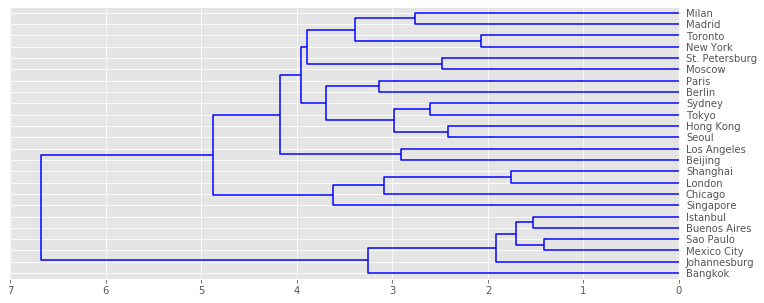

In [7]:
dend = dendrogram(Z, orientation='left', color_threshold=0.0, labels=df.City.values)

In [8]:
label = fcluster(Z, 3.8, criterion='distance')

In [9]:
np.unique(label)

array([1, 2, 3, 4, 5, 6], dtype=int32)

In [10]:
df.loc[:,'label'] = label

In [11]:
# теперь проинтерпретируем полученные кластеры

for i, group in df.groupby('label'):
    print('=' * 10)
    print('cluster {}'.format(i))
    print (group)

cluster 1
            City  Общ транспорт  Электроник  Эффективность ЧТ  Shared T  \
17       Bangkok              7          17                19        22   
19  Buenos Aires             20          22                20        18   
20  Johannesburg             17          20                16        23   
21      Istanbul             23          21                23        24   
22   Mexico City             16          23                24        21   
23     Sao Paulo             24          24                22        20   

    Внешнее подкл  Билетная сист  Устойчивость  Дороги  Безопасность  \
17             24             18            18      20            19   
19             21             21            23      19            21   
20             19             19            21      22            23   
21             20             20            20      24            20   
22             23             22            24      23            24   
23             22             24